# Analysis of discrimination across datasets/classifier predictions

In [ ]:
%load_ext autoreload
%autoreload 


import os
import sys
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append(os.path.join('..', 'src'))
import plots
import metrics 
from utlis import standardize_metrics 
from model_fitting import logistic_model
from synthetic_generator import SyntheticLoanDataGenerator



sns.set_style("whitegrid")  
sns.set_context("paper", font_scale=1.6)
pd.set_option('display.max_columns', 10)
pd.set_option("display.precision", 5)






In [2]:
from tueplots import bundles
bundles.aaai2024()
plt.rcParams.update(bundles.aaai2024())
# Increase the resolution of all the plots below
plt.rcParams.update({"figure.dpi": 800})

In [3]:
sensitive_attributes = ['Gender', 'Race']
outcome_col = 'Y'
results = {}
scaling_method='MinMax'
sensitivity_scaling_method='MinMax'
mode = 'MAD'


### Dataset with no discrimination

In [4]:
no_bias = pd.read_csv('../generated_data/no_discri_lambda_10000.csv')
nobias_metrics_results, no_biaseval_subgroup_rates = metrics.evaluation_data(no_bias, sensitive_attributes, outcome_col, mode)
results['No bias'] = nobias_metrics_results

### Dataset with Single discrimination

In [5]:
single_discrimination = pd.read_csv('../generated_data/single_discri_tg_10000.csv')
single_bias_results, single_subgroup_rates = metrics.evaluation_data(single_discrimination, sensitive_attributes, outcome_col, mode)
results['Single-axis bias'] = single_bias_results

### Dataset with Multiple Discrimination

In [6]:
multiple_discrimination =pd.read_csv('../generated_data/multiple_discri_tg_10000.csv')
multiple_bias_results, multiple_subgroup_rates = metrics.evaluation_data(multiple_discrimination, sensitive_attributes, outcome_col, mode)
results['Multiple bias'] = multiple_bias_results

### Dataset with Intersectional Discrimination

In [8]:
intersectional_discrimination = pd.read_csv('../generated_data/intersectional_discri_tg10000.csv')
intersectional_bias_results, intersectional_subgroup_rates = metrics.evaluation_data(intersectional_discrimination, sensitive_attributes, outcome_col,mode)
results['Intersectional bias'] = intersectional_bias_results

### Dataset with Compounded Discrimination


In [9]:
compound_discrimination = pd.read_csv('../generated_data/compounded_discri_tg10000.csv')
compound_bias_results, compound_subgroup_rates = metrics.evaluation_data(compound_discrimination, sensitive_attributes, outcome_col,mode)
results['Compounded bias'] = compound_bias_results

### Plot the metrics 

In [ ]:
# results
dpi = 1200
pd.DataFrame.from_dict(results, orient='index')

,demographic_disparity,elift,slift,subgroup_unfairness
No bias,0.07088,0.03716,0.07352,0.00943
Single-axis bias,0.29761,0.18764,0.35326,0.08780
Multiple bias,0.40357,0.28619,0.51679,0.08192
Intersectional bias,0.30018,0.23821,0.35694,0.06940
Compounded bias,0.47205,0.33033,0.63875,0.12642


In [11]:
if scaling_method == 'none':
    plots.plot_metrics(results, output_file='intersectional_fairness_metrics_on_data.pdf', data_type = 'Generated Data',  dpi=dpi)

else:
    scaled_results = standardize_metrics(results, scalar_type=scaling_method)
    plots.plot_metrics(scaled_results, output_file='intersectional_fairness_metrics_on_data.pdf', data_type = 'Generated Data',  dpi=dpi, scaling_method=scaling_method)
    



/Users/kanubalad/Desktop/Saarland/PhD_Research/PythonCodes/AIES25/On-the-Misalignment-Between-Legal-Notions-and-Statistical-Metrics-of-Intersectional-Fairness/Notebooks/../src/plots.py:186: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


## ANALYSIS ON THE CLASSIFIERS

In [12]:
get_summary = False
split_data = True
classifier_results = {}
outcome_col = 'y_true'
prediction_col = 'y_hat'
metrics_classifier = {}

### No Bias Data

In [13]:
df_nobias, metrics_nobias = logistic_model(no_bias, get_summary=get_summary, split_data=split_data)
nobias_results, nosubgroup_rates = metrics.evaluation_classifier(df_nobias, sensitive_attributes, outcome_col, prediction_col, mode)
classifier_results['No bias'] = nobias_results
metrics_classifier['No bias'] = metrics_nobias

Optimization terminated successfully.
         Current function value: 0.143220
         Iterations 10


### Single Axis Discrimination

In [14]:
df_single, metrics_single = logistic_model(single_discrimination, get_summary=get_summary, split_data=split_data)
singlebias_results, singlesubgroup_rates = metrics.evaluation_classifier(df_single, sensitive_attributes, outcome_col, prediction_col,mode)
classifier_results['Single-axis bias'] = singlebias_results
metrics_classifier['Single-axis bias'] = metrics_single

Optimization terminated successfully.
         Current function value: 0.149023
         Iterations 10


### Multiple Discrimination

In [15]:

df_multiple, metrics_multiple = logistic_model(multiple_discrimination, get_summary=get_summary, split_data=split_data)

multiplebias_results, multiplesubgroup_rates = metrics.evaluation_classifier(df_multiple, sensitive_attributes, outcome_col, prediction_col,mode)
classifier_results['Multiple bias'] = multiplebias_results
metrics_classifier['Multiple bias'] = metrics_multiple

Optimization terminated successfully.
         Current function value: 0.135880
         Iterations 10


### Intesectionality Discrimination

In [16]:
df_intersectionality, metrics_intersectionality = logistic_model(intersectional_discrimination, get_summary=get_summary, split_data=split_data)

intersectionbias_results, multiplesubgroup_rates = metrics.evaluation_classifier(df_intersectionality, sensitive_attributes, outcome_col, prediction_col,mode)
classifier_results['Intersectional bias'] = intersectionbias_results
metrics_classifier['Intersectional bias'] = metrics_intersectionality

Optimization terminated successfully.
         Current function value: 0.149583
         Iterations 10


#### Compounded Discrimination

In [ ]:
df_compound, metrics_compound = logistic_model(compound_discrimination, get_summary=get_summary, split_data=split_data)

compoundbias_results, compoundsubgroup_rates = metrics.evaluation_classifier(df_compound, sensitive_attributes, outcome_col, prediction_col,mode)
classifier_results['Compounded bias'] = compoundbias_results
metrics_classifier['Compounded bias'] = metrics_compound


Optimization terminated successfully.
         Current function value: 0.126530
         Iterations 10


In [27]:
# plots.plot_grouped_metrics(metrics_classifier, title = 'Evaluation Metrics of the ', output_file='classifier_evaluation.pdf', data_type='Classifier Predictions', dpi=600)

# if scaling_method == 'none':
#     plots.plot_metrics(classifier_results, output_file='intersectional_fairness_classifier_on_classifier.pdf', data_type = 'Classifier Predictions',  dpi=dpi)

# else:
#     scaled_results_classifier = standardize_metrics(classifier_results, scalar_type=scaling_method)
#     plots.plot_grouped_metrics(scaled_results_classifier, output_file='intersectional_fairness_classifier_on_classifier.pdf', data_type = 'Classifier Predictions',  dpi=dpi, scaling_method=scaling_method)
    

### Sensitivity to Single

###  Sensitivity to Interaction Effects

In [28]:

base_profile = {"E": 0.25, "I": 2.0, "L": 7.0, "D": 6.3, "Y": 0.8}
scales = [0, 0.1, 0.2,0.3, 0.4,  0.5, 0.8, 1.0, 1.2]
interaction_profiles = [
    {k: round(v * s, 2) for k, v in base_profile.items()} for s in scales]

outcome_col = 'Y'

In [34]:
sample_size = 10000
random_seed = 42
prob_gender = 0.5
prob_race = 0.5
beta_S = 0.6
beta_I = 0.8
beta = 0.03 # account influence of I, S in L
gamma = 0.10 # if set to 0 then no effect from sensitive attributes, 0.15
delta = 0.75  # influence of L, D in Y
eta = 2.0
plot_intersectional=True


all_results = []
for i, profile in enumerate(interaction_profiles):
    thetas = {'G': 0.0, 'R': 0.0, 'GR': profile['E']}
    beta_coef = {'G': 0.0, 'R': 0.0, 'GR': profile['I']}
    rhos = {'G': 0.0, 'R': 0.0, 'GR': profile['L']}
    kappas = {'G': 0.0, 'R': 0.0, 'GR': profile['D']}
    nus = {'G': 0.0, 'R': 0.0, 'GR': profile['Y']}
    lambdas = {'E': 1.0,'I': 1.0,'L': 1.0,'D': -1.0,'Y': 1.0}
    
    # Generate data and evaluate metrics
    generator = SyntheticLoanDataGenerator(
        sample_size=sample_size,
        random_seed=random_seed,
        prob_gender=prob_gender,
        prob_race=prob_race,
        beta=beta, beta_I=beta_I, beta_S=beta_S,
        gamma=gamma, eta=eta, delta=delta,
        measure_bias_col='Gender',
        thetas=thetas, beta_coef=beta_coef,
        rhos=rhos, kappas=kappas, nus=nus,
        lambdas=lambdas
    )

    data_intersectional = generator.synthetic_data_generation()
    intersectional_df = data_intersectional['data_df']
    # print(intersectional_df.columns)
    
    results_, subgroup_rates = metrics.evaluation_data(intersectional_df, sensitive_attributes, outcome_col, mode)
    # print(f"results for profile {profile}: {results_}")
    
    profile_results = profile.copy()  # E, I, L, D, Y
    profile_results.update(results_)  # Add metrics to the same dict
    all_results.append(profile_results)    
    
df_results_intersectional = pd.DataFrame(all_results)

df_results_intersectional = standardize_metrics(df_results_intersectional, data_type='df', scalar_type=sensitivity_scaling_method, 
                                        columns_to_scale=['demographic_disparity', 'elift', 'slift','subgroup_unfairness'])

    
df_results_intersectional.to_csv("../generated_data/interactional_metric_sweep.csv", index=False)






/var/folders/cf/xgy1fywj3q1bylrhvlp36psc0000gn/T/ipykernel_33538/2735022567.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


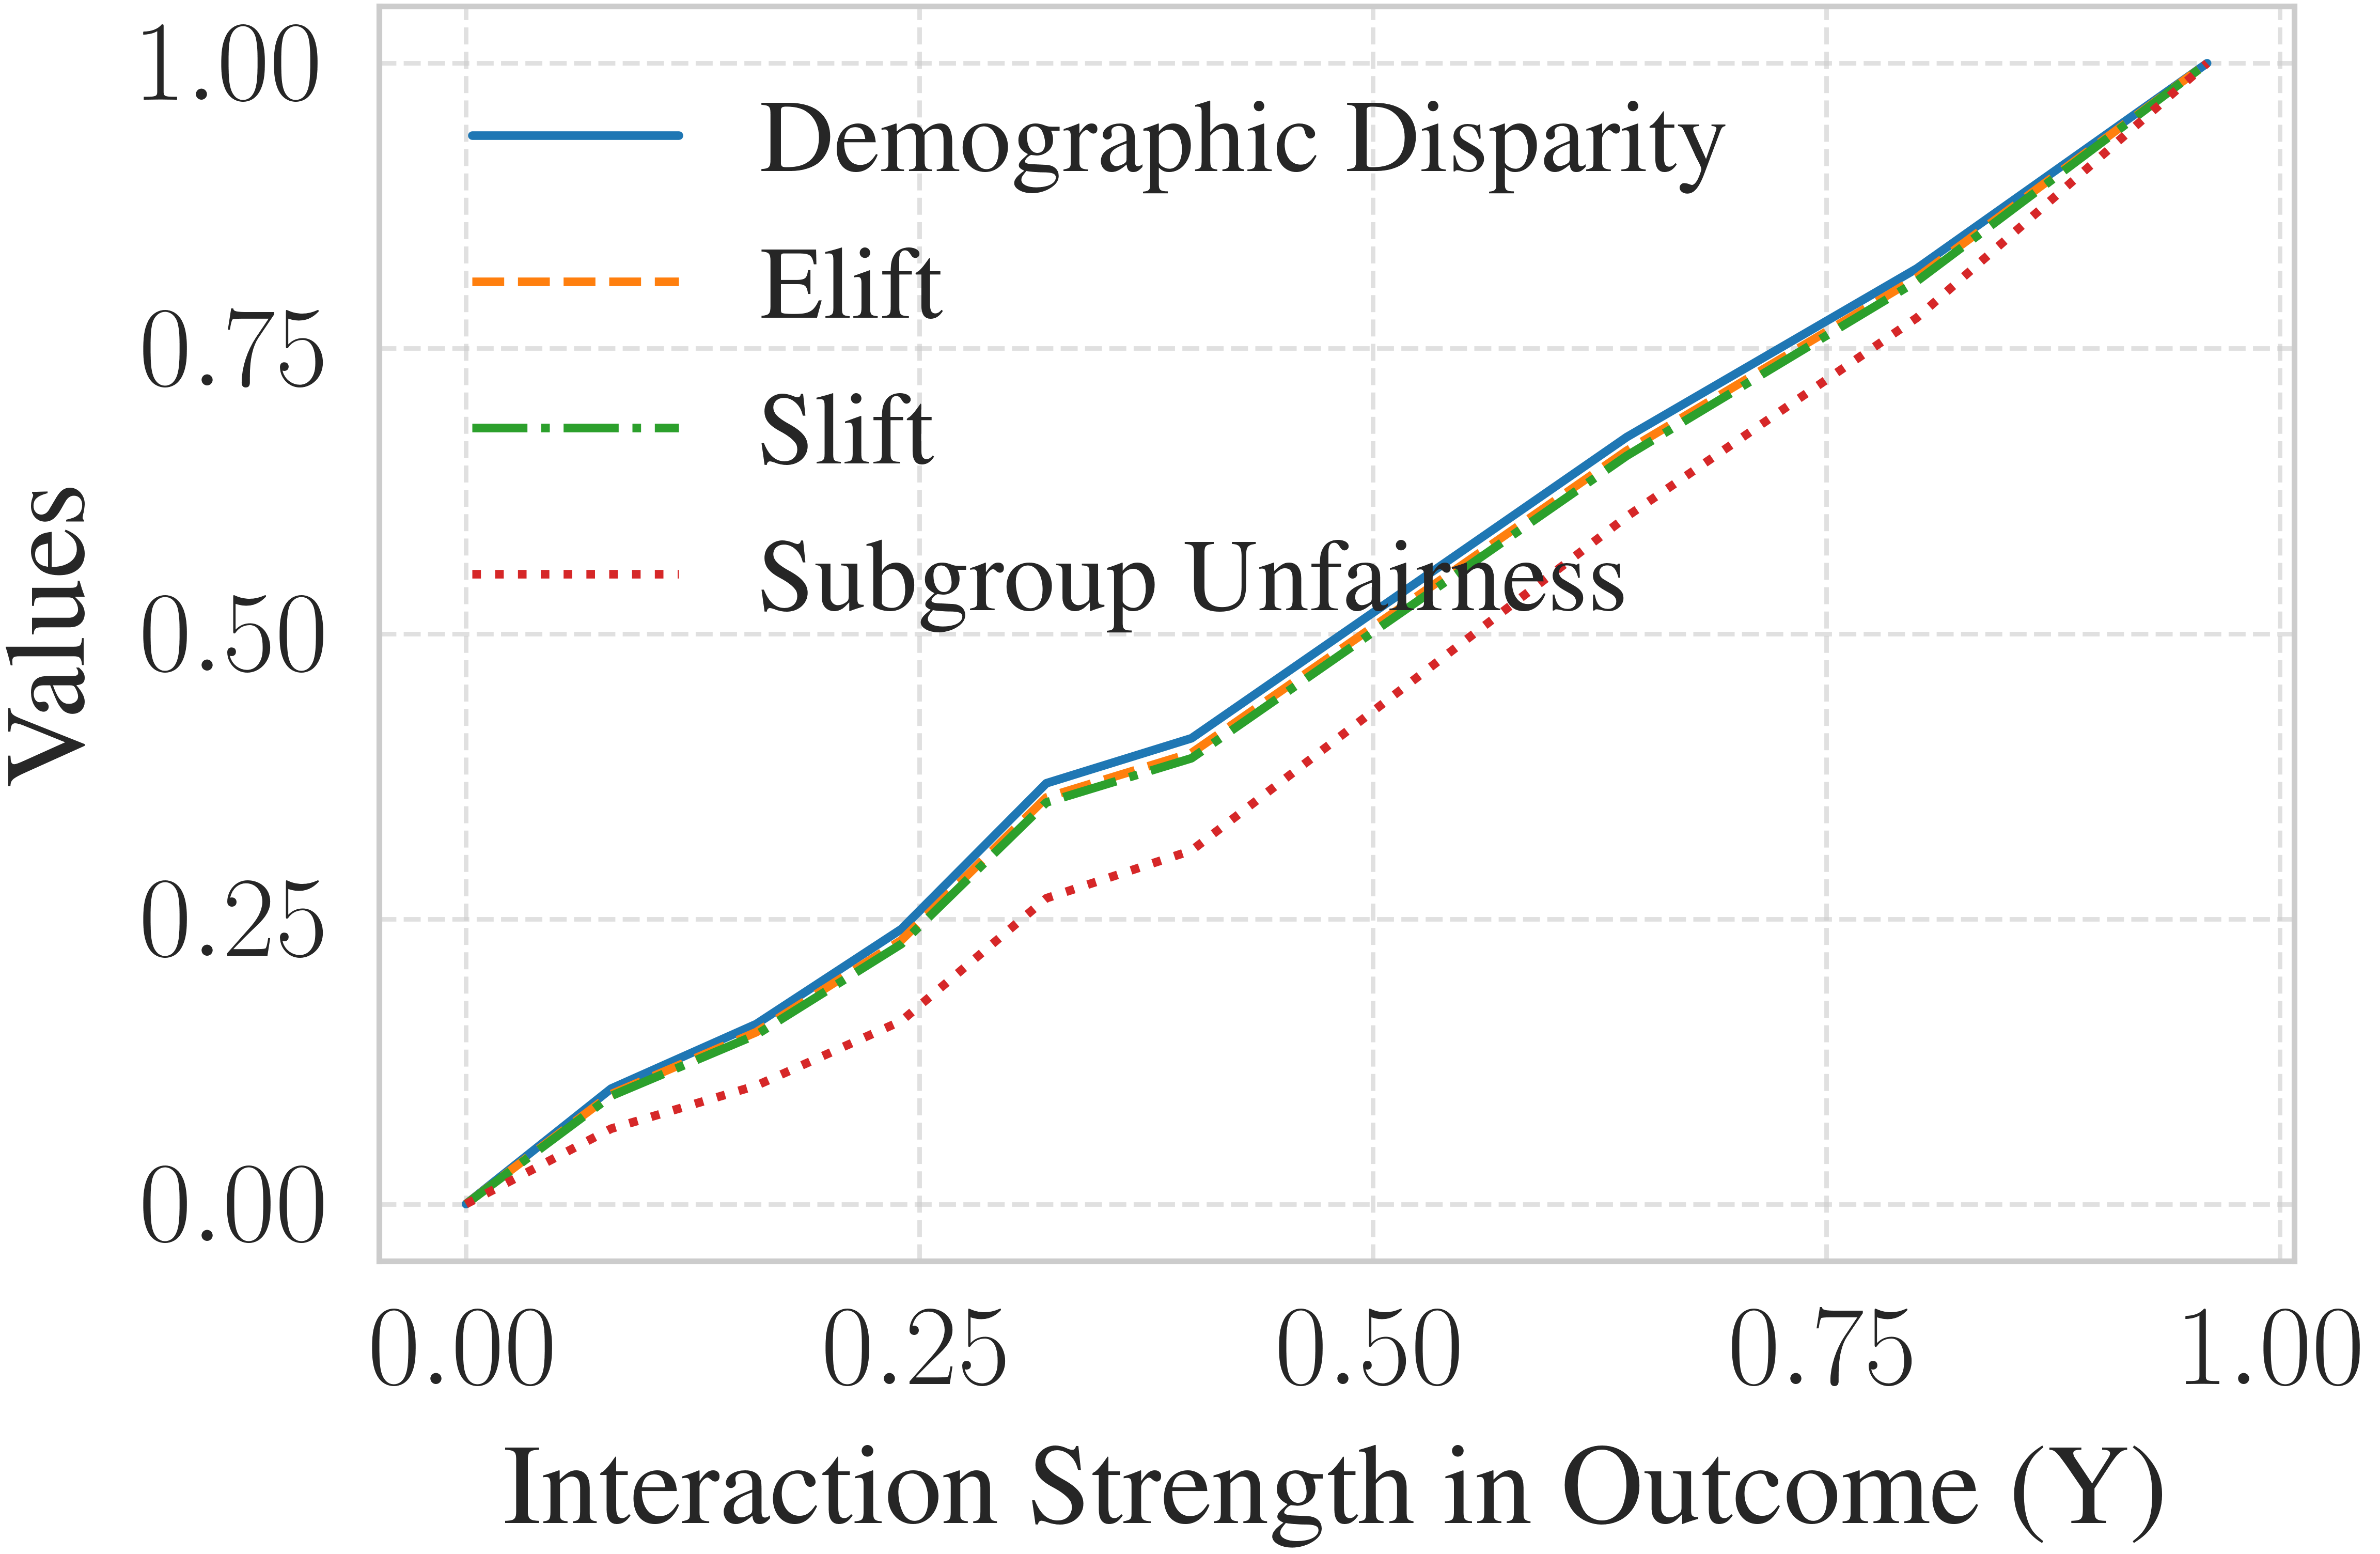

In [35]:
fig, ax = plt.subplots(figsize=(6, 4))  
metrics_to_plot = ['demographic_disparity', 'elift', 'slift','subgroup_unfairness']

# metrics_to_plot = ['idd_worst_disparity','idd_additive', 'idd_intersectional']
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), '-', (0, (5, 1))]  

for metric, ls in zip(metrics_to_plot, linestyles):
    ax.plot(df_results_intersectional['Y'], df_results_intersectional[metric], label=metric.replace('_', ' ').title(), linestyle=ls, linewidth=1.5)

# Set axis labels
ax.set_xlabel(r"Interaction Strength in Outcome (Y)", labelpad=6, fontsize=20)
ax.set_ylabel(rf'Values', labelpad=6, fontsize=20)

# Set tick parameters
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

# Add grid and legend
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(loc='upper left', frameon=False, fontsize=18)

plt.tight_layout()

# Save figure
plt.savefig("../images/intersectional_sensitivity_plot_data.pdf", format='pdf', bbox_inches='tight')



### Sensitivity of Multiple 

In [31]:
base_profile_additive = {"E": 0.25, "I": 2.0, "L": 7.0, "D": 6.3, "Y": 0.8}
scales = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1.0, 1.2]

additive_profiles = [
    {k: round(v * s, 2) for k, v in base_profile_additive.items()} for s in scales]


all_results_additive = []
for profile in additive_profiles:
    thetas = {'G': profile['E'], 'R': profile['E'], 'GR': 0.0}
    beta_coef = {'G': profile['I'], 'R': profile['I'], 'GR': 0.0}
    rhos = {'G': profile['L'], 'R': profile['L'], 'GR': 0.0}
    kappas = {'G': profile['D'], 'R': profile['D'], 'GR': 0.0}
    nus = {'G': profile['Y'], 'R': profile['Y'], 'GR': 0.0}
    lambdas = {'E': 1.0, 'I': 1.0, 'L': 1.0, 'D': -1.0, 'Y': 1.0}

    generator = SyntheticLoanDataGenerator(
        sample_size=sample_size,
        random_seed=random_seed,
        prob_gender=prob_gender,
        prob_race=prob_race,
        beta=beta, beta_I=beta_I, beta_S=beta_S,
        gamma=gamma, eta=eta, delta=delta,
        measure_bias_col='Gender',
        thetas=thetas, beta_coef=beta_coef,
        rhos=rhos, kappas=kappas, nus=nus,
        lambdas=lambdas
    )

    data_additive = generator.synthetic_data_generation()
    additive_df = data_additive['data_df']
    results_, subgroup_rates = metrics.evaluation_data(additive_df, sensitive_attributes, outcome_col, mode)

    profile_results = profile.copy()
    profile_results.update(results_)
    all_results_additive.append(profile_results)

df_results_additive = pd.DataFrame(all_results_additive)

df_results_additive = standardize_metrics(df_results_additive, data_type='df', scalar_type=sensitivity_scaling_method, 
                                        columns_to_scale=['demographic_disparity', 'elift', 'slift','subgroup_unfairness' 
                                    ])

df_results_additive.to_csv("../generated_data/additive_metric_sweep.csv", index=False)


/var/folders/cf/xgy1fywj3q1bylrhvlp36psc0000gn/T/ipykernel_33538/930330092.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


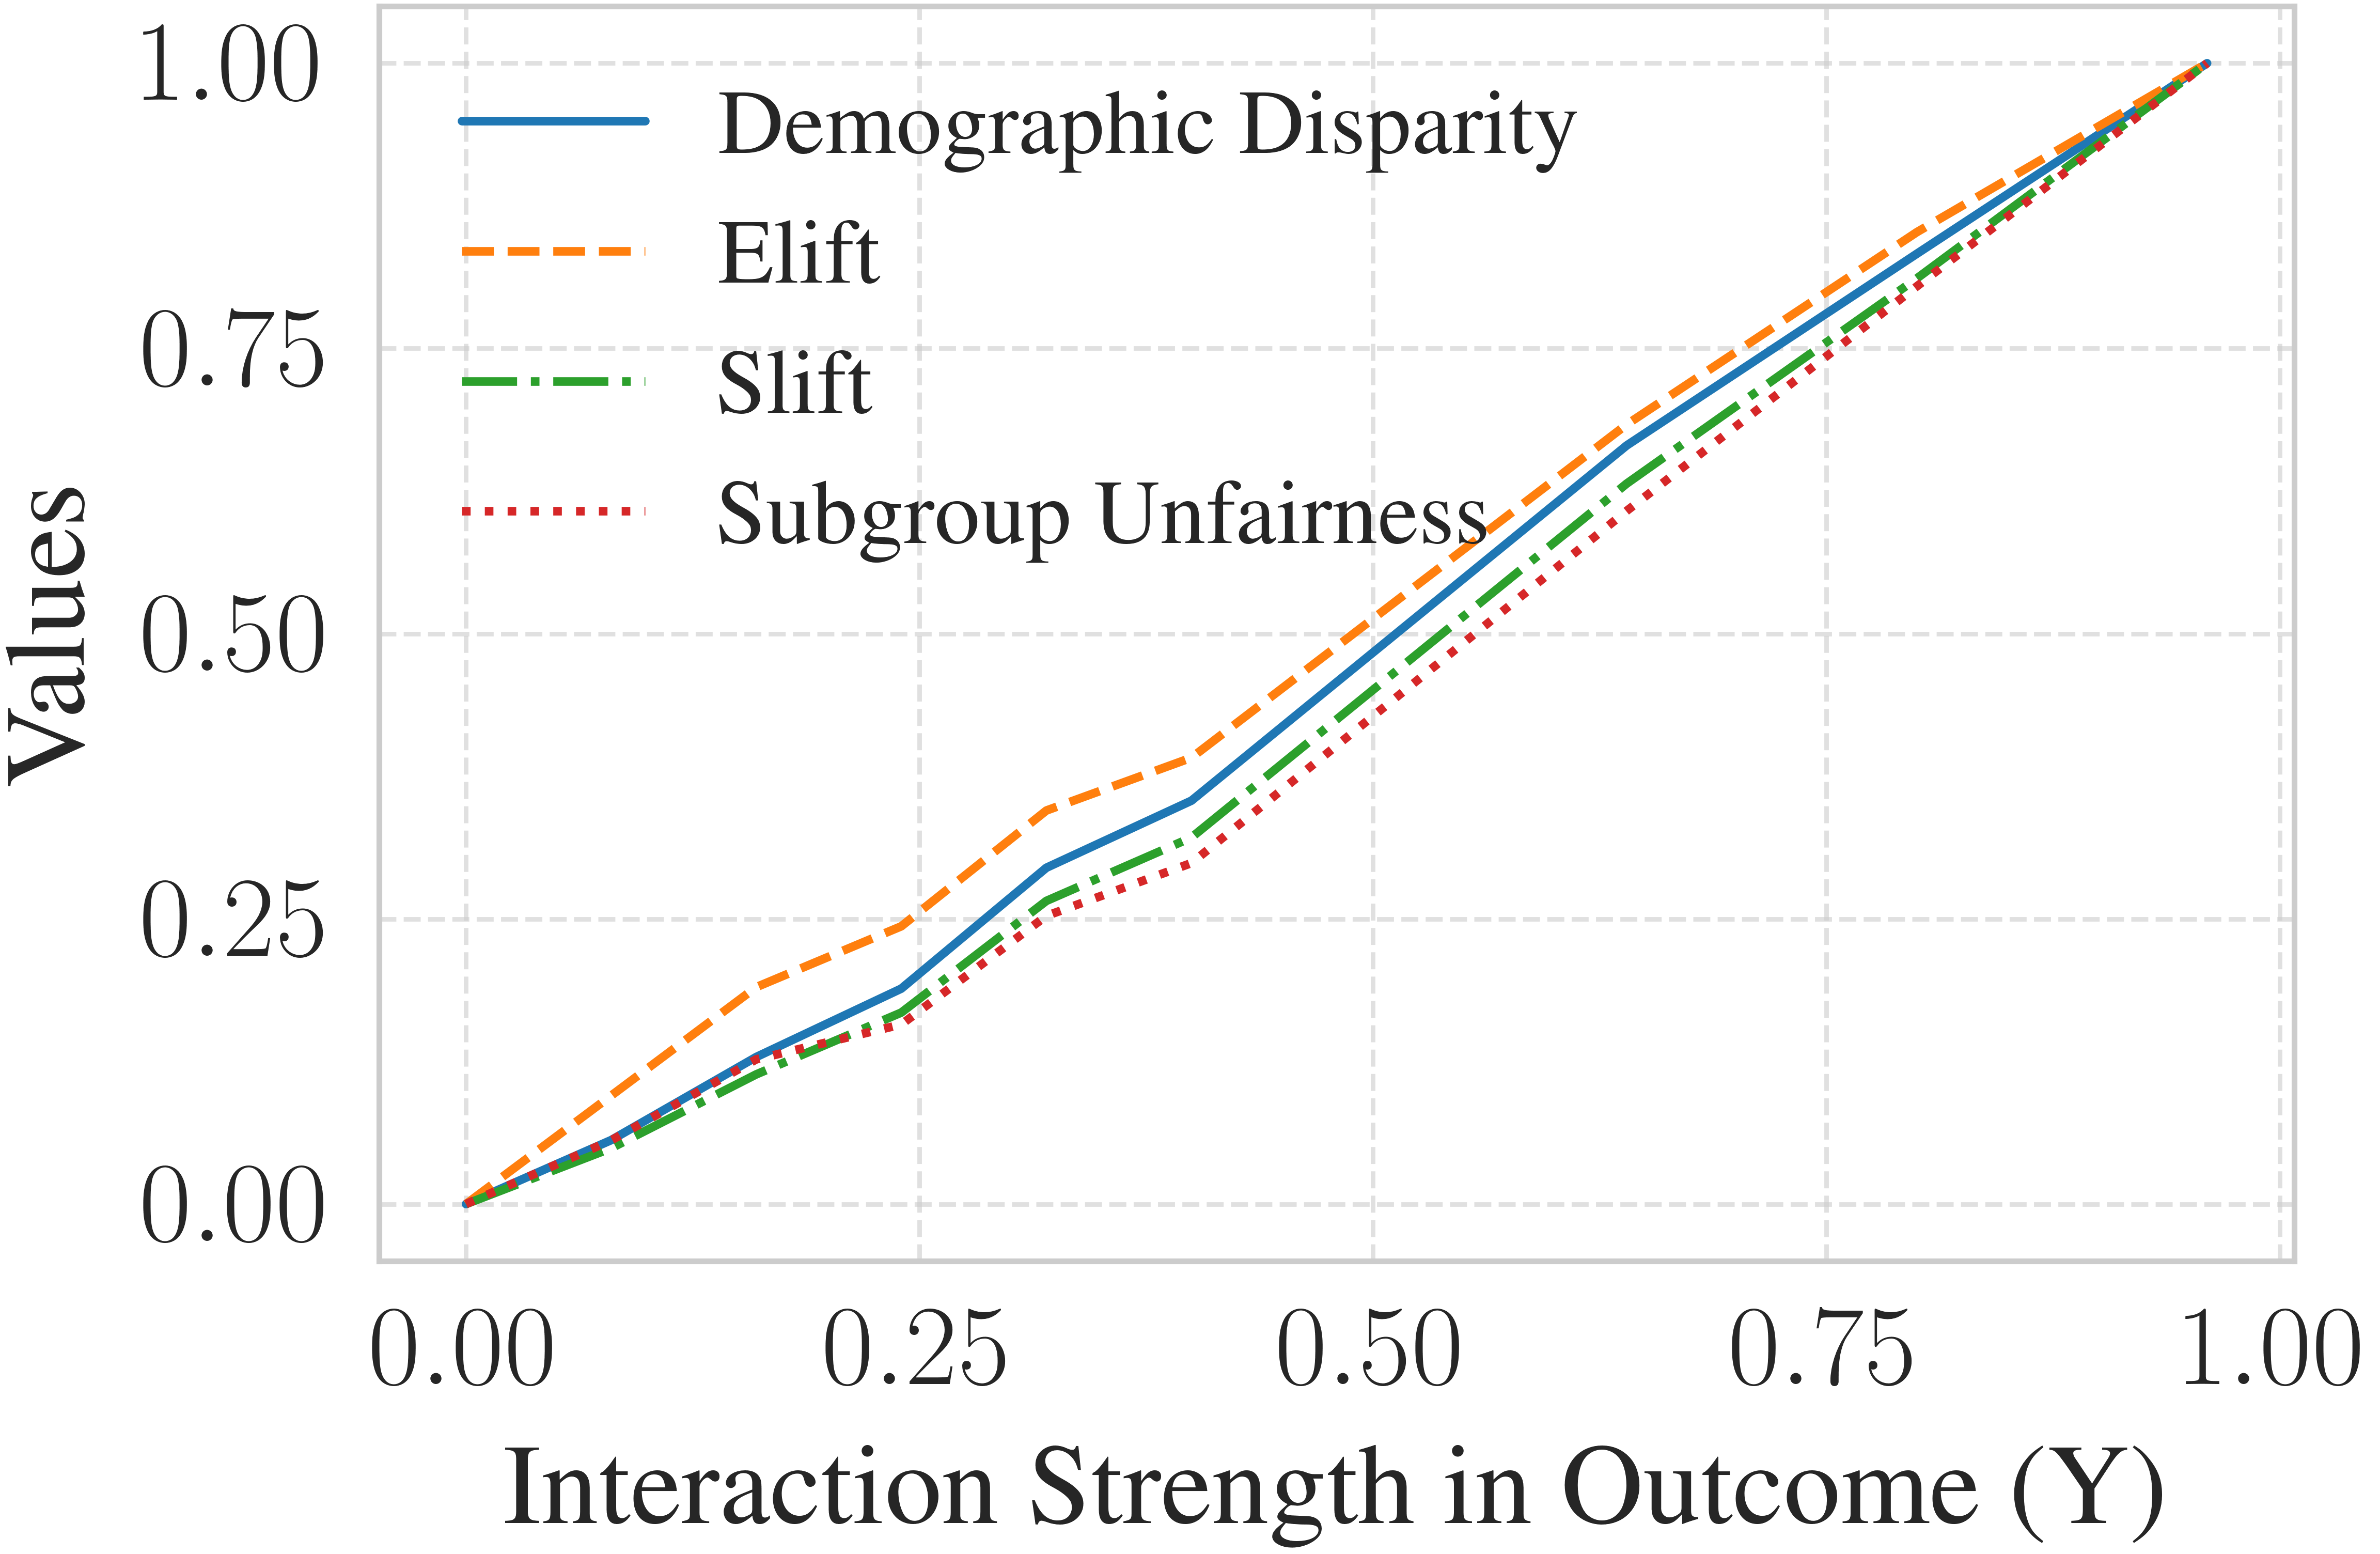

In [32]:

# Plotting
fig, ax = plt.subplots(figsize=(6, 4)) 

metrics_to_plot = ['demographic_disparity', 'elift', 'slift','subgroup_unfairness'
                                                          ]

# metrics_to_plot = ['idd_worst_disparity','idd_additive', 'idd_intersectional']

linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), '-', (0, (5, 1))]  


for metric, ls in zip(metrics_to_plot, linestyles):
    ax.plot(df_results_additive['Y'], df_results_additive[metric], label=metric.replace('_', ' ').title(), linestyle=ls, linewidth=1.5)

# ax.set_xlabel(r'\textbf{Interaction Strength in Outcome (Y)}', labelpad=6, fontsize=20)

ax.set_xlabel(r"Interaction Strength in Outcome (Y)", labelpad=6, fontsize=20)
# ax.set_ylabel(r'\textbf{Scaled Scores}', labelpad=6, fontsize=18)
# ax.set_ylabel(rf'\textbf{{{sensitivity_scaling_method} scaled values}}', labelpad=6, fontsize=20)

ax.set_ylabel(rf'Values', labelpad=6, fontsize=20)


# ax.set_title(r'\textbf{Sensitivity to Outcome,  Multiple Discrimination}', pad=10, fontsize=18)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(loc='upper left', frameon=False, fontsize=16)
plt.tight_layout()

# Save figure
plt.savefig("../images/additive_sensitivity_plot_data.pdf", format='pdf', bbox_inches='tight')